In [54]:
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
fashion = tf.keras.datasets.fashion_mnist

In [8]:
(x_train_full , y_train_full) , (x_test , y_test) = fashion.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [10]:
x_train_full.shape

(60000, 28, 28)

In [11]:
x_train_full[0].shape

(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

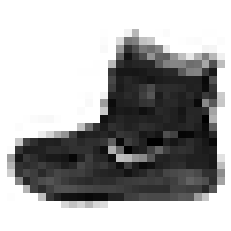

In [24]:
img = x_train_full[0]
plt.imshow(img , cmap="binary")
plt.axis("off")
plt.show

In [25]:
img.max(),img.min()

(255, 0)

<AxesSubplot:>

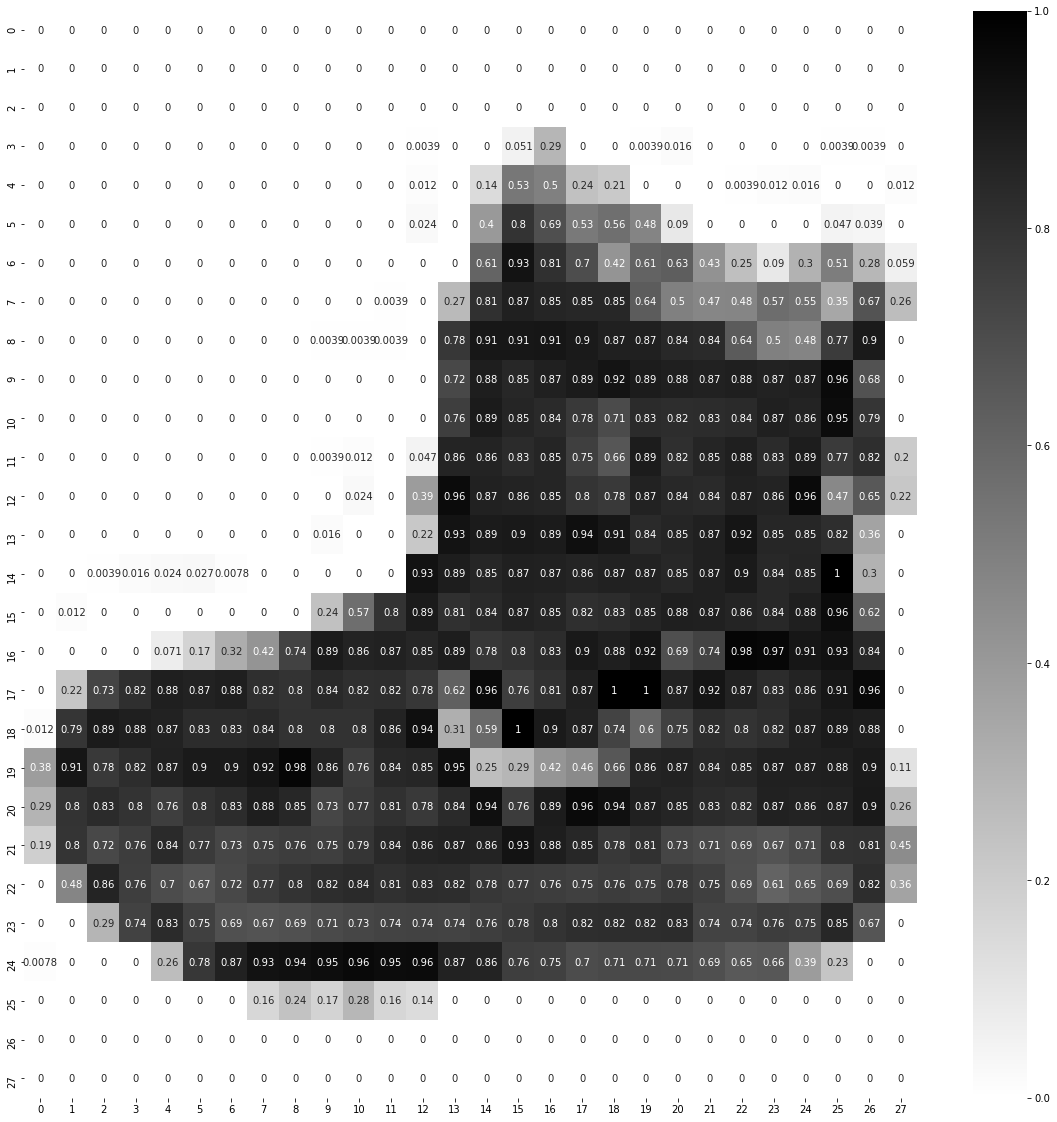

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True , cmap="binary")


In [27]:
x_valid , x_train = x_train_full[:5000]/255. , x_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
x_test = x_test/255.

In [29]:
x_valid.shape

(5000, 28, 28)

In [36]:
Layers = [tf.keras.layers.Flatten(input_shape = [28,28], name = "input_layer"),
          tf.keras.layers.Dense(300,activation = "relu" , name = "hidden_layer_1"),
          tf.keras.layers.Dense(100,activation = "relu" , name = "hidden_layer_2"),
          tf.keras.layers.Dense(10,activation = "softmax" , name = "output_layer")
    
         ]




In [37]:
model_clf = tf.keras.models.Sequential(Layers)

In [38]:
model_clf.layers

In [40]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
loss_function = "sparse_categorical_crossentropy"
Optimizer = "SGD"
metrics = ["accuracy"]
model_clf.compile(loss= loss_function , optimizer = Optimizer , metrics= metrics)

In [44]:
Epochs = 30 
Validation_data = (x_valid , y_valid)
history = model_clf.fit(x_train,y_train , epochs= Epochs , validation_data= Validation_data)

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1998 - accuracy: 0.9274 - val_loss: 0.2867 - val_accuracy: 0.8980
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1953 - accuracy: 0.9304 - val_loss: 0.2948 - val_accuracy: 0.8956
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1923 - accuracy: 0.9308 - val_loss: 0.2870 - val_accuracy: 0.8992
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1885 - accuracy: 0.9318 - val_loss: 0.2897 - val_accuracy: 0.8974
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1863 - accuracy: 0.9330 - val_loss: 0.3022 - val_accuracy: 0.8904
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1833 - accuracy: 0.9346 - val_loss: 0.2894 - val_accuracy: 0.8976
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1794 - accuracy: 0.9351 - val_loss: 0.2999 - val_accuracy:

In [45]:
history.history

{'loss': [0.19979000091552734,
  0.19531039893627167,
  0.19226081669330597,
  0.18850143253803253,
  0.18632523715496063,
  0.18334801495075226,
  0.17943023145198822,
  0.1764616072177887,
  0.1748301088809967,
  0.17261433601379395,
  0.17025746405124664,
  0.1655806303024292,
  0.16300375759601593,
  0.16134341061115265,
  0.1575467437505722,
  0.15494541823863983,
  0.1517459899187088,
  0.15019671618938446,
  0.14806029200553894,
  0.14554628729820251,
  0.14377182722091675,
  0.14137497544288635,
  0.13905462622642517,
  0.13572090864181519,
  0.13393887877464294,
  0.13255393505096436,
  0.1293354630470276,
  0.12811987102031708,
  0.1252254843711853,
  0.12220572680234909],
 'accuracy': [0.927436351776123,
  0.930400013923645,
  0.9308182001113892,
  0.9317818284034729,
  0.9330363869667053,
  0.9345818161964417,
  0.9351454377174377,
  0.9368909001350403,
  0.9368727207183838,
  0.9380000233650208,
  0.9390363693237305,
  0.9398727416992188,
  0.9417999982833862,
  0.94174546

<function matplotlib.pyplot.show(close=None, block=None)>

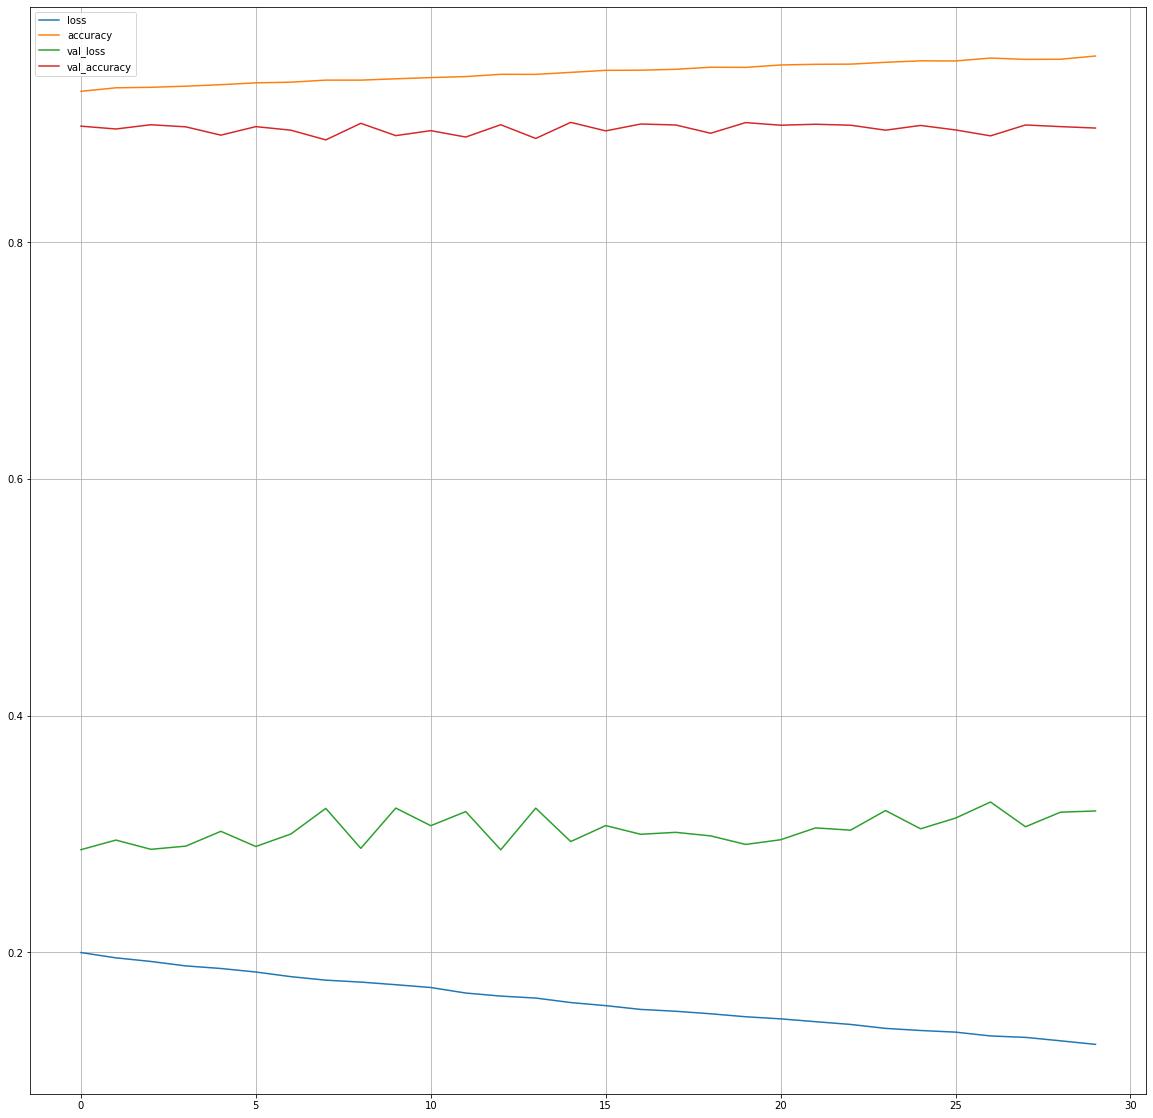

In [47]:
pd.DataFrame(history.history).plot(figsize=(20,20))
plt.grid(True)
plt.show

In [48]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 0s 717us/step - loss: 0.3538 - accuracy: 0.8895


[0.3538312017917633, 0.8895000219345093]

In [52]:
y_prob = model_clf.predict(x_test[:3])

In [53]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.005, 0.   ,
        0.995],
       [0.   , 0.   , 0.992, 0.   , 0.008, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [55]:
y_pred = np.argmax(y_prob , axis=1)

In [56]:
y_pred

array([9, 2, 1], dtype=int64)

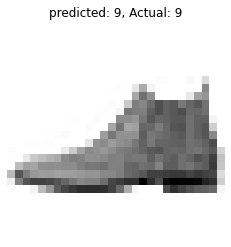

--------------------------------------------------------------------------------


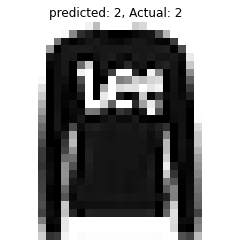

--------------------------------------------------------------------------------


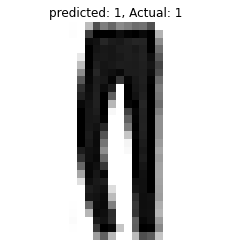

--------------------------------------------------------------------------------


In [59]:
for img_array, pred, actual in zip(x_test[:3], y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("----"*20)